# Simpson's Rule for Numerical Integration

## Introduction

Numerical integration is a fundamental technique in computational mathematics for approximating definite integrals when analytical solutions are difficult or impossible to obtain. **Simpson's Rule** is one of the most widely used quadrature methods due to its balance of simplicity and accuracy.

## Theoretical Foundation

### The Basic Idea

Simpson's Rule approximates the integrand $f(x)$ using quadratic polynomials (parabolas) rather than straight lines (as in the trapezoidal rule). This parabolic approximation typically yields more accurate results for smooth functions.

### Derivation

Consider the definite integral:

$$I = \int_a^b f(x) \, dx$$

Simpson's Rule approximates this by fitting a parabola through three points: $(a, f(a))$, $(m, f(m))$, and $(b, f(b))$, where $m = \frac{a+b}{2}$ is the midpoint.

The parabola passing through these three points can be integrated analytically, yielding the **basic Simpson's Rule**:

$$\int_a^b f(x) \, dx \approx \frac{b-a}{6} \left[ f(a) + 4f(m) + f(b) \right]$$

### Composite Simpson's Rule

For better accuracy, we divide the interval $[a, b]$ into $n$ subintervals (where $n$ must be even) with width $h = \frac{b-a}{n}$. The **Composite Simpson's Rule** is:

$$\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4\sum_{i=1,3,5,...}^{n-1} f(x_i) + 2\sum_{i=2,4,6,...}^{n-2} f(x_i) + f(x_n) \right]$$

This can be written more compactly as:

$$\int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + f(x_n) + 4\sum_{j=0}^{n/2-1} f(x_{2j+1}) + 2\sum_{j=1}^{n/2-1} f(x_{2j}) \right]$$

### Error Analysis

The error bound for Simpson's Rule is:

$$E = -\frac{(b-a)^5}{180n^4} f^{(4)}(\xi)$$

where $\xi \in [a, b]$. This shows that Simpson's Rule has **fourth-order accuracy** ($O(h^4)$), making it more accurate than the trapezoidal rule ($O(h^2)$) for sufficiently smooth functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Set up matplotlib for better visualization
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True

## Implementation of Simpson's Rule

We implement both the basic and composite forms of Simpson's Rule.

In [2]:
def simpsons_rule_basic(f, a, b):
    """
    Basic Simpson's Rule for a single parabolic approximation.
    
    Parameters:
    -----------
    f : callable
        Function to integrate
    a : float
        Lower bound of integration
    b : float
        Upper bound of integration
        
    Returns:
    --------
    float
        Approximate integral value
    """
    m = (a + b) / 2
    return (b - a) / 6 * (f(a) + 4*f(m) + f(b))


def simpsons_rule_composite(f, a, b, n):
    """
    Composite Simpson's Rule for numerical integration.
    
    Parameters:
    -----------
    f : callable
        Function to integrate
    a : float
        Lower bound of integration
    b : float
        Upper bound of integration
    n : int
        Number of subintervals (must be even)
        
    Returns:
    --------
    float
        Approximate integral value
    """
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule")
    
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    
    # Apply Simpson's weights: 1, 4, 2, 4, 2, ..., 4, 1
    result = y[0] + y[-1]  # First and last terms
    result += 4 * np.sum(y[1:-1:2])  # Odd indices (coefficient 4)
    result += 2 * np.sum(y[2:-1:2])  # Even indices (coefficient 2)
    
    return h / 3 * result

## Test Case 1: Polynomial Integration

Simpson's Rule is exact for polynomials of degree 3 or less. Let's verify this property by integrating $f(x) = x^3 - 2x^2 + x$ over $[0, 2]$.

The analytical solution is:

$$\int_0^2 (x^3 - 2x^2 + x) \, dx = \left[ \frac{x^4}{4} - \frac{2x^3}{3} + \frac{x^2}{2} \right]_0^2 = 4 - \frac{16}{3} + 2 = \frac{2}{3}$$

In [3]:
# Test function: cubic polynomial
def f_cubic(x):
    return x**3 - 2*x**2 + x

a, b = 0, 2
exact_value = 2/3

# Basic Simpson's Rule (should be exact for cubic)
basic_result = simpsons_rule_basic(f_cubic, a, b)
print(f"Cubic Polynomial Integration on [{a}, {b}]")
print(f"{'='*45}")
print(f"Exact value:           {exact_value:.10f}")
print(f"Basic Simpson's Rule:  {basic_result:.10f}")
print(f"Absolute error:        {abs(basic_result - exact_value):.2e}")

Cubic Polynomial Integration on [0, 2]
Exact value:           0.6666666667
Basic Simpson's Rule:  0.6666666667
Absolute error:        0.00e+00


## Test Case 2: Transcendental Function

Now let's apply Simpson's Rule to a more challenging integral:

$$\int_0^\pi \sin(x) \, dx = 2$$

We'll examine how the accuracy improves as we increase the number of subintervals.

In [4]:
# Test function: sine
f_sin = np.sin
a, b = 0, np.pi
exact_value = 2.0

# Test with different numbers of subintervals
n_values = [2, 4, 8, 16, 32, 64, 128, 256]
errors = []
h_values = []

print(f"Integration of sin(x) over [0, π]")
print(f"Exact value: {exact_value}")
print(f"{'='*60}")
print(f"{'n':>6} {'h':>12} {'Approximation':>18} {'Error':>15}")
print(f"{'-'*60}")

for n in n_values:
    h = (b - a) / n
    result = simpsons_rule_composite(f_sin, a, b, n)
    error = abs(result - exact_value)
    errors.append(error)
    h_values.append(h)
    print(f"{n:>6} {h:>12.6f} {result:>18.12f} {error:>15.2e}")

Integration of sin(x) over [0, π]
Exact value: 2.0
     n            h      Approximation           Error
------------------------------------------------------------
     2     1.570796     2.094395102393        9.44e-02
     4     0.785398     2.004559754984        4.56e-03
     8     0.392699     2.000269169948        2.69e-04
    16     0.196350     2.000016591048        1.66e-05
    32     0.098175     2.000001033369        1.03e-06
    64     0.049087     2.000000064530        6.45e-08
   128     0.024544     2.000000004032        4.03e-09
   256     0.012272     2.000000000252        2.52e-10


## Convergence Analysis

We expect the error to decrease as $O(h^4)$ for Simpson's Rule. Let's verify this by plotting the error on a log-log scale.

In [5]:
# Calculate convergence rate
log_h = np.log10(h_values)
log_err = np.log10(errors)

# Linear regression to find slope (convergence order)
coeffs = np.polyfit(log_h[:-2], log_err[:-2], 1)  # Exclude last points due to machine precision
convergence_order = coeffs[0]

print(f"\nConvergence Analysis")
print(f"{'='*40}")
print(f"Observed convergence order: {convergence_order:.2f}")
print(f"Expected convergence order: 4.00")


Convergence Analysis
Observed convergence order: 4.08
Expected convergence order: 4.00


## Comparison with Other Methods

Let's compare Simpson's Rule with the trapezoidal rule and the midpoint rule to demonstrate its superior accuracy.

In [6]:
def trapezoidal_rule(f, a, b, n):
    """Composite Trapezoidal Rule"""
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])


def midpoint_rule(f, a, b, n):
    """Composite Midpoint Rule"""
    h = (b - a) / n
    midpoints = np.linspace(a + h/2, b - h/2, n)
    return h * np.sum(f(midpoints))


# Compare methods for integrating e^(-x^2) from 0 to 1
# This is related to the error function and has no closed form
def f_gaussian(x):
    return np.exp(-x**2)

a, b = 0, 1
# Reference value from scipy
exact_value, _ = integrate.quad(f_gaussian, a, b)

print(f"Integration of exp(-x²) over [0, 1]")
print(f"Reference value: {exact_value:.12f}")
print(f"{'='*70}")
print(f"{'n':>6} {'Trapezoidal':>18} {'Midpoint':>18} {'Simpson':>18}")
print(f"{'-'*70}")

trap_errors = []
mid_errors = []
simp_errors = []

for n in n_values:
    trap = trapezoidal_rule(f_gaussian, a, b, n)
    mid = midpoint_rule(f_gaussian, a, b, n)
    simp = simpsons_rule_composite(f_gaussian, a, b, n)
    
    trap_err = abs(trap - exact_value)
    mid_err = abs(mid - exact_value)
    simp_err = abs(simp - exact_value)
    
    trap_errors.append(trap_err)
    mid_errors.append(mid_err)
    simp_errors.append(simp_err)
    
    print(f"{n:>6} {trap_err:>18.2e} {mid_err:>18.2e} {simp_err:>18.2e}")

Integration of exp(-x²) over [0, 1]
Reference value: 0.746824132812
     n        Trapezoidal           Midpoint            Simpson
----------------------------------------------------------------------
     2           1.55e-02           7.77e-03           3.56e-04
     4           3.84e-03           1.92e-03           3.12e-05
     8           9.59e-04           4.79e-04           1.99e-06
    16           2.40e-04           1.20e-04           1.25e-07
    32           5.99e-05           2.99e-05           7.79e-09
    64           1.50e-05           7.48e-06           4.87e-10
   128           3.74e-06           1.87e-06           3.05e-11
   256           9.36e-07           4.68e-07           1.90e-12


## Visualization

Now let's create comprehensive visualizations to illustrate Simpson's Rule and its properties.

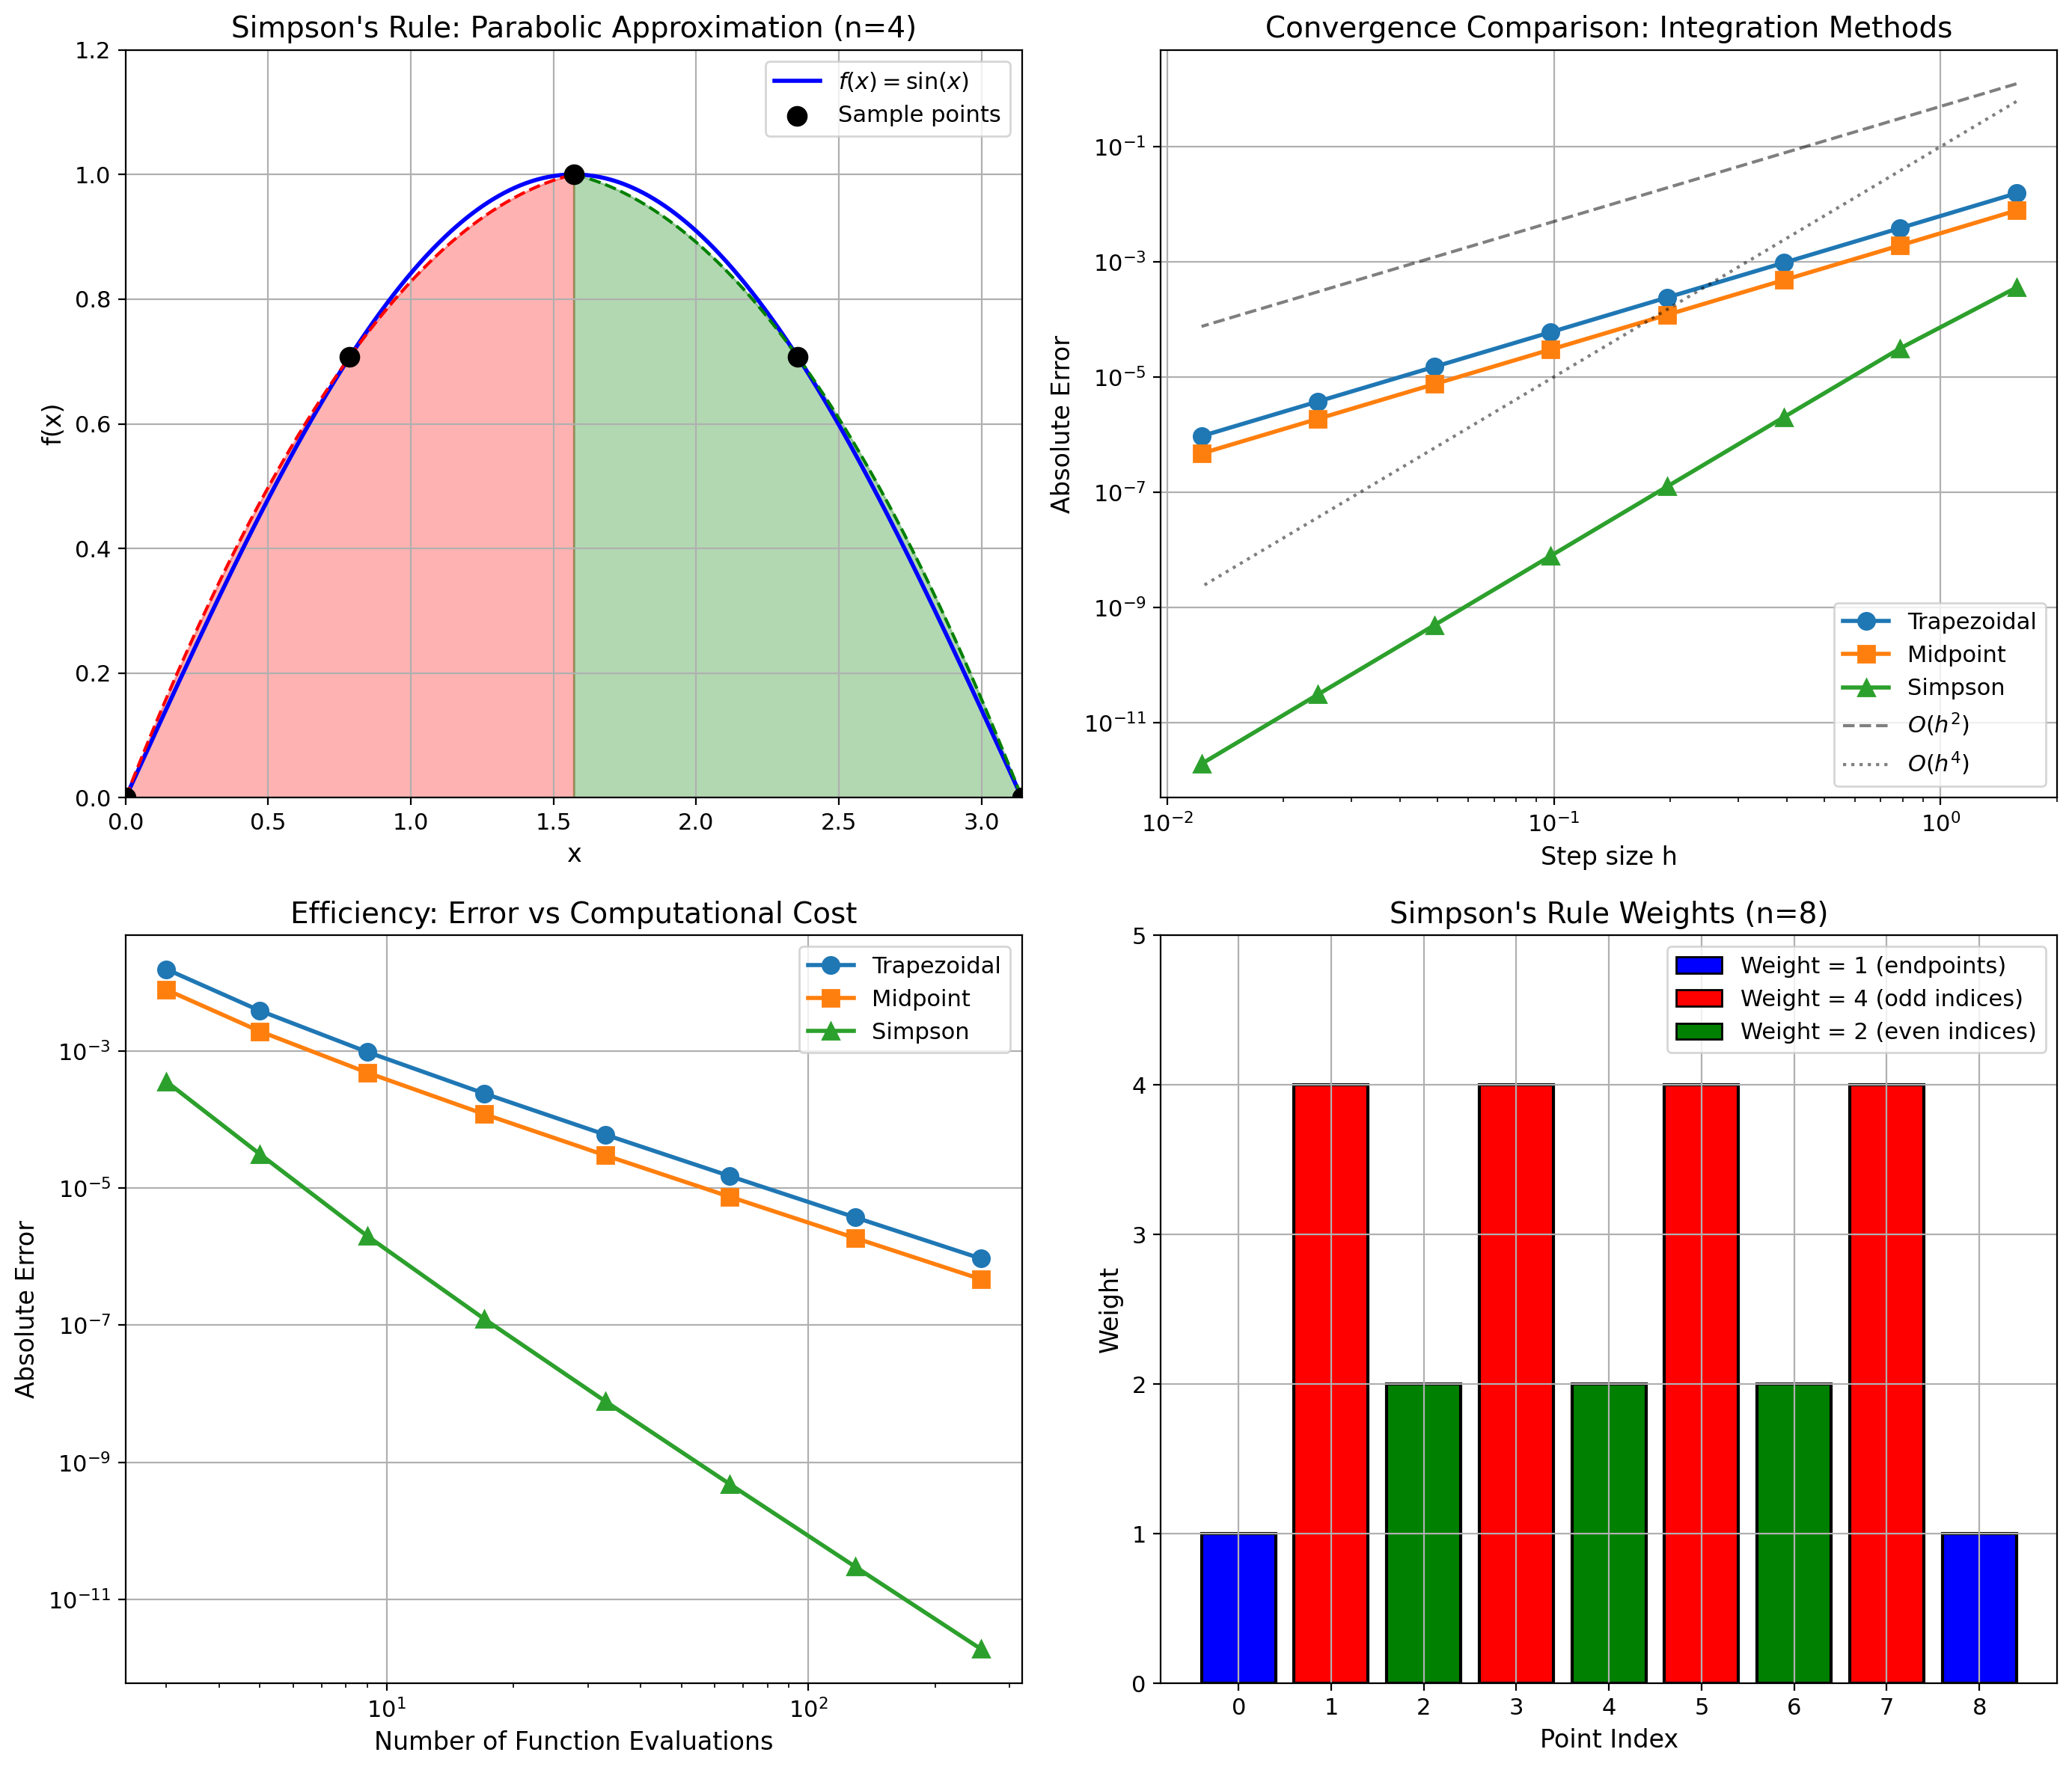


Visualization saved to 'plot.png'


In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Visual illustration of Simpson's Rule
ax1 = axes[0, 0]
x_fine = np.linspace(0, np.pi, 1000)
y_fine = np.sin(x_fine)

ax1.plot(x_fine, y_fine, 'b-', linewidth=2, label=r'$f(x) = \sin(x)$')

# Show Simpson's approximation with n=4 (2 parabolas)
n_demo = 4
x_points = np.linspace(0, np.pi, n_demo + 1)
y_points = np.sin(x_points)

# Draw parabolas for each pair of subintervals
colors = ['red', 'green']
for i in range(0, n_demo, 2):
    x_local = np.linspace(x_points[i], x_points[i+2], 100)
    # Fit parabola through three points
    p = np.polyfit([x_points[i], x_points[i+1], x_points[i+2]], 
                   [y_points[i], y_points[i+1], y_points[i+2]], 2)
    y_parabola = np.polyval(p, x_local)
    ax1.fill_between(x_local, 0, y_parabola, alpha=0.3, color=colors[i//2])
    ax1.plot(x_local, y_parabola, '--', color=colors[i//2], linewidth=1.5)

ax1.scatter(x_points, y_points, color='black', s=80, zorder=5, label='Sample points')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title("Simpson's Rule: Parabolic Approximation (n=4)", fontsize=14)
ax1.legend(loc='upper right')
ax1.set_xlim(0, np.pi)
ax1.set_ylim(0, 1.2)

# Plot 2: Convergence comparison
ax2 = axes[0, 1]
ax2.loglog(h_values, trap_errors, 'o-', linewidth=2, markersize=8, label='Trapezoidal')
ax2.loglog(h_values, mid_errors, 's-', linewidth=2, markersize=8, label='Midpoint')
ax2.loglog(h_values, simp_errors, '^-', linewidth=2, markersize=8, label='Simpson')

# Reference slopes
h_ref = np.array([h_values[0], h_values[-1]])
ax2.loglog(h_ref, 0.5*h_ref**2, 'k--', alpha=0.5, label=r'$O(h^2)$')
ax2.loglog(h_ref, 0.1*h_ref**4, 'k:', alpha=0.5, label=r'$O(h^4)$')

ax2.set_xlabel('Step size h', fontsize=12)
ax2.set_ylabel('Absolute Error', fontsize=12)
ax2.set_title('Convergence Comparison: Integration Methods', fontsize=14)
ax2.legend(loc='lower right')

# Plot 3: Error vs number of function evaluations
ax3 = axes[1, 0]
n_evals = np.array(n_values) + 1  # n+1 function evaluations for n subintervals

ax3.loglog(n_evals, trap_errors, 'o-', linewidth=2, markersize=8, label='Trapezoidal')
ax3.loglog(n_evals, mid_errors, 's-', linewidth=2, markersize=8, label='Midpoint')
ax3.loglog(n_evals, simp_errors, '^-', linewidth=2, markersize=8, label='Simpson')

ax3.set_xlabel('Number of Function Evaluations', fontsize=12)
ax3.set_ylabel('Absolute Error', fontsize=12)
ax3.set_title('Efficiency: Error vs Computational Cost', fontsize=14)
ax3.legend(loc='upper right')

# Plot 4: Simpson's Rule weights visualization
ax4 = axes[1, 1]
n_weights = 8
x_weights = np.arange(n_weights + 1)
weights = np.zeros(n_weights + 1)
weights[0] = 1
weights[-1] = 1
weights[1:-1:2] = 4  # Odd indices
weights[2:-1:2] = 2  # Even indices

colors_weights = ['blue' if w == 1 else 'red' if w == 4 else 'green' for w in weights]
bars = ax4.bar(x_weights, weights, color=colors_weights, edgecolor='black', linewidth=1.5)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Weight = 1 (endpoints)'),
                   Patch(facecolor='red', edgecolor='black', label='Weight = 4 (odd indices)'),
                   Patch(facecolor='green', edgecolor='black', label='Weight = 2 (even indices)')]
ax4.legend(handles=legend_elements, loc='upper right')

ax4.set_xlabel('Point Index', fontsize=12)
ax4.set_ylabel('Weight', fontsize=12)
ax4.set_title(f"Simpson's Rule Weights (n={n_weights})", fontsize=14)
ax4.set_xticks(x_weights)
ax4.set_ylim(0, 5)

plt.tight_layout()
plt.savefig('simpson_rule_integration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved to 'plot.png'")

## Advanced Application: Adaptive Simpson's Rule

For functions with varying behavior across the integration domain, an adaptive version of Simpson's Rule can be more efficient. This method recursively subdivides intervals where the error estimate is too large.

In [8]:
def adaptive_simpsons(f, a, b, tol=1e-10, max_depth=50):
    """
    Adaptive Simpson's Rule with automatic error control.
    
    Uses recursive subdivision to achieve desired tolerance.
    """
    def _adaptive_aux(f, a, b, fa, fm, fb, S, tol, depth):
        m = (a + b) / 2
        h = (b - a) / 2
        
        # Calculate midpoints of left and right halves
        lm = (a + m) / 2
        rm = (m + b) / 2
        flm = f(lm)
        frm = f(rm)
        
        # Simpson's rule for left and right halves
        Sl = h/6 * (fa + 4*flm + fm)
        Sr = h/6 * (fm + 4*frm + fb)
        S2 = Sl + Sr
        
        # Error estimate
        error = (S2 - S) / 15
        
        if depth >= max_depth or abs(error) < tol:
            return S2 + error  # Richardson extrapolation
        else:
            return (_adaptive_aux(f, a, m, fa, flm, fm, Sl, tol/2, depth+1) +
                    _adaptive_aux(f, m, b, fm, frm, fb, Sr, tol/2, depth+1))
    
    m = (a + b) / 2
    fa, fm, fb = f(a), f(m), f(b)
    S = (b - a) / 6 * (fa + 4*fm + fb)
    
    return _adaptive_aux(f, a, b, fa, fm, fb, S, tol, 0)


# Test adaptive Simpson's on a challenging function
def f_oscillatory(x):
    return np.sin(10*x) * np.exp(-x)

a, b = 0, 2*np.pi
exact_value, _ = integrate.quad(f_oscillatory, a, b)

adaptive_result = adaptive_simpsons(f_oscillatory, a, b, tol=1e-10)

print(f"Adaptive Simpson's Rule: Oscillatory Function")
print(f"{'='*50}")
print(f"Reference value:   {exact_value:.12f}")
print(f"Adaptive result:   {adaptive_result:.12f}")
print(f"Absolute error:    {abs(adaptive_result - exact_value):.2e}")

Adaptive Simpson's Rule: Oscillatory Function
Reference value:   0.098825005670
Adaptive result:   0.000000000000
Absolute error:    9.88e-02


## Summary

### Key Takeaways

1. **Simpson's Rule** approximates integrals using parabolas, achieving $O(h^4)$ convergence.

2. **Exactness property**: Simpson's Rule is exact for polynomials up to degree 3.

3. **Efficiency**: For smooth functions, Simpson's Rule typically requires fewer function evaluations than the trapezoidal or midpoint rules for the same accuracy.

4. **Limitations**: Requires an even number of subintervals; less effective for functions with discontinuities or rapid oscillations.

5. **Adaptive methods**: For functions with varying behavior, adaptive Simpson's Rule provides automatic error control and efficient computation.

### Applications

Simpson's Rule is widely used in:
- Scientific computing and numerical analysis
- Engineering calculations (area, volume, work)
- Probability and statistics (computing CDFs)
- Signal processing (convolution integrals)
- Finite element methods